# Plan outline
1. Import libraries and data
2. Perform exploratory data analysis 
3. Find missing data/corrupt data 
4. Visualize necessary data 


In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\Serg\\Untitled Folder'

In [3]:
os.chdir("D:\Documents\BCG Data Science")

In [4]:
os.listdir()

['BCG_VI.html',
 'BCG_VI.pdf',
 'Executive summary.pptx',
 'ml_case_training_data.csv',
 'ml_case_training_hist_data.csv',
 'ml_case_training_output.csv',
 'New Microsoft Word Document.docx']

# 1. Importing libraries

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Importing Data

In [6]:
training_data = pd.read_csv("ml_case_training_data.csv")
churn_data = pd.read_csv("ml_case_training_output.csv")
historical_data = pd.read_csv("ml_case_training_hist_data.csv")

In [7]:
training_data.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


It is clear that this dataframe has a lot of null values, which we will have to deal with later 

In [8]:
churn_data.head()

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0


Churn data seems to be formated correctly as either 0 or 1. 

In [9]:
historical_data.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


Seems like this dataframe has too many 0's for periods 2 and 3 for both energy and power prices

Can combine churn data with train data now to access them more easily,they would have to be combined later anyway. The common key is ID.


In [10]:
train = pd.merge(training_data,churn_data, on = "id")

In [11]:
train.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


In [12]:
train.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,...,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,...,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16096.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,...,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.099093
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,...,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421,0.298796
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,...,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,...,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000,0.000000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,...,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.000000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,...,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000,0.000000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,...,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000


A lot of negative data for consumption which is unlikely. Can mean that the data is corrupt or the negative sign has been put mistakingly.

# 3. Finding missing and corrupt data

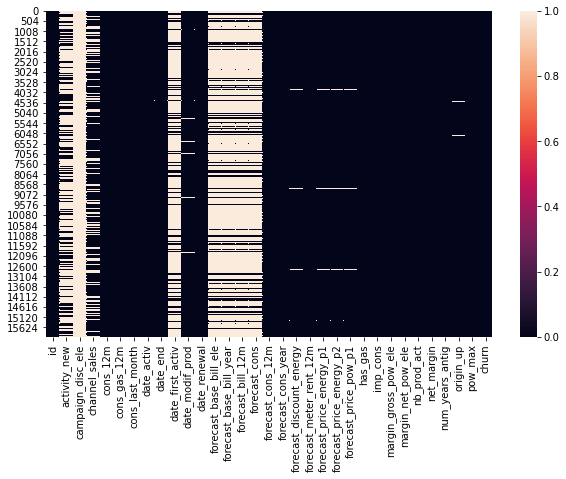

In [13]:
plt.figure(figsize = (10,6))

sns.heatmap(train.isnull())

plt.show()

In [14]:
pd.DataFrame({"Missing values (%)": train.isnull().sum()/len(train.index)*100})

,Missing values (%)
id,0.000000
activity_new,59.300447
campaign_disc_ele,100.000000
channel_sales,26.205268
cons_12m,0.000000
cons_gas_12m,0.000000
cons_last_month,0.000000
date_activ,0.000000
date_end,0.012425
date_first_activ,78.205765


There is too much data missing in the columns describing forecast of energy and power prices/consumption and date of first active contract. Also, origin_up and customer activity have a lot of missing data. Origin_up relates to code of the electricity campaign the customer first subscribed to, so likely irrelevant, but activity data can be useful, so will be explored later. 

In [15]:
train.columns

Index(['id', 'activity_new', 'campaign_disc_ele', 'channel_sales', 'cons_12m',
       'cons_gas_12m', 'cons_last_month', 'date_activ', 'date_end',
       'date_first_activ', 'date_modif_prod', 'date_renewal',
       'forecast_base_bill_ele', 'forecast_base_bill_year',
       'forecast_bill_12m', 'forecast_cons', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

In [16]:
train.drop(['campaign_disc_ele','date_first_activ', 'date_modif_prod','date_renewal',
            'forecast_base_bill_ele', 'forecast_base_bill_year',
            'forecast_bill_12m', 'forecast_cons',
           'origin_up'],axis = 1, inplace = True)

In [17]:
#checking for duplicates
train[train.duplicated()]

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,forecast_cons_12m,forecast_cons_year,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn


In [18]:
#checking to see what types the entries are 
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   channel_sales             11878 non-null  object 
 3   cons_12m                  16096 non-null  int64  
 4   cons_gas_12m              16096 non-null  int64  
 5   cons_last_month           16096 non-null  int64  
 6   date_activ                16096 non-null  object 
 7   date_end                  16094 non-null  object 
 8   forecast_cons_12m         16096 non-null  float64
 9   forecast_cons_year        16096 non-null  int64  
 10  forecast_discount_energy  15970 non-null  float64
 11  forecast_meter_rent_12m   16096 non-null  float64
 12  forecast_price_energy_p1  15970 non-null  float64
 13  forecast_price_energy_p2  15970 non-null  float64
 14  foreca

In [19]:
type(train["date_activ"][0])

str

In [20]:
train["date_activ"][0]

'2012-11-07'

In [21]:
train["date_activ"] = pd.to_datetime(train["date_activ"], format='%Y-%m-%d')
train["date_end"] = pd.to_datetime(train["date_end"], format = "%Y-%m-%d")


In [22]:
type(train["has_gas"][0])

str

In [23]:
train.groupby("has_gas")["has_gas"].count()

has_gas
f    13132
t     2964
Name: has_gas, dtype: int64

Looks like the only values are f and t, presumably, standing for false or true. Can map 0,1 instead of f and t to make it easier to use the data in the future

In [24]:
d = {'f' : 0, 't' : 1}

train["has_gas"] = train["has_gas"].map(d)

In [25]:
train["has_gas"]

0        0
1        1
2        0
3        0
4        0
        ..
16091    1
16092    0
16093    0
16094    0
16095    0
Name: has_gas, Length: 16096, dtype: int64

Secondly, I will have a look at historical data of the prices.

In [26]:
historical_data.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [27]:
historical_data.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


Firstly, I will address the negative values of price_fix

In [28]:
historical_data[(historical_data["price_p1_fix"] < 0)|(historical_data["price_p1_fix"] < 0)|(historical_data["price_p1_fix"] < 0)]

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
23138,951d99fe07ca94c2139f43bc37095139,2015-03-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166
28350,f7bdc6fa1067cd26fd80bfb9f3fca28f,2015-03-01,0.131032,0.108896,0.076955,-0.162916,-0.097749,-0.065166
98575,9b523ad5ba8aa2e524dcda5b3d54dab2,2015-02-01,0.129444,0.106863,0.075004,-0.162916,-0.097749,-0.065166
113467,cfd098ee6c567eb32374c77d20571bc7,2015-02-01,0.123086,0.100505,0.068646,-0.162916,-0.097749,-0.065166
118467,51d7d8a0bf6b8bd94f8c1de7942c66ea,2015-07-01,0.128132,0.105996,0.074056,-0.162912,-0.097752,-0.065172
125819,decc0a647016e183ded972595cd2b9fb,2015-03-01,0.124937,0.102814,0.069071,-0.162916,-0.097749,-0.065166
128761,cc214d7c05de3ee17a7691e274ac488e,2015-06-01,0.124675,0.102539,0.070596,-0.162912,-0.097752,-0.065172
141011,2a4ed325054472e03cdcc9a34693be4b,2015-02-01,0.167317,0.083347,0.000000,-0.177779,0.000000,0.000000
160827,395a6f41bbd1a0f23a64f00645264e78,2015-04-01,0.121352,0.098771,0.066912,-0.162916,-0.097749,-0.065166
181811,d4a84ff4ec620151ef05bdef0cf27eab,2015-05-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166


There are not many values but the problem is they are negtive and < 1, whereas all power prices seem to be much larger than 1. I will just drop the entries of price_fix that are <0.

In [29]:
i = historical_data[(historical_data["price_p1_fix"] < 0)|(historical_data["price_p1_fix"] < 0)|(historical_data["price_p1_fix"] < 0)].index

In [30]:
historical_data.drop(index = i, axis = 0,inplace = True)

In [31]:
missing_data_percentage = pd.DataFrame({"Missing values (%)": historical_data.isnull().sum()/len(historical_data.index)*100})
                                      
missing_data_percentage

,Missing values (%)
id,0.000000
price_date,0.000000
price_p1_var,0.704174
price_p2_var,0.704174
price_p3_var,0.704174
price_p1_fix,0.704174
price_p2_fix,0.704174
price_p3_fix,0.704174


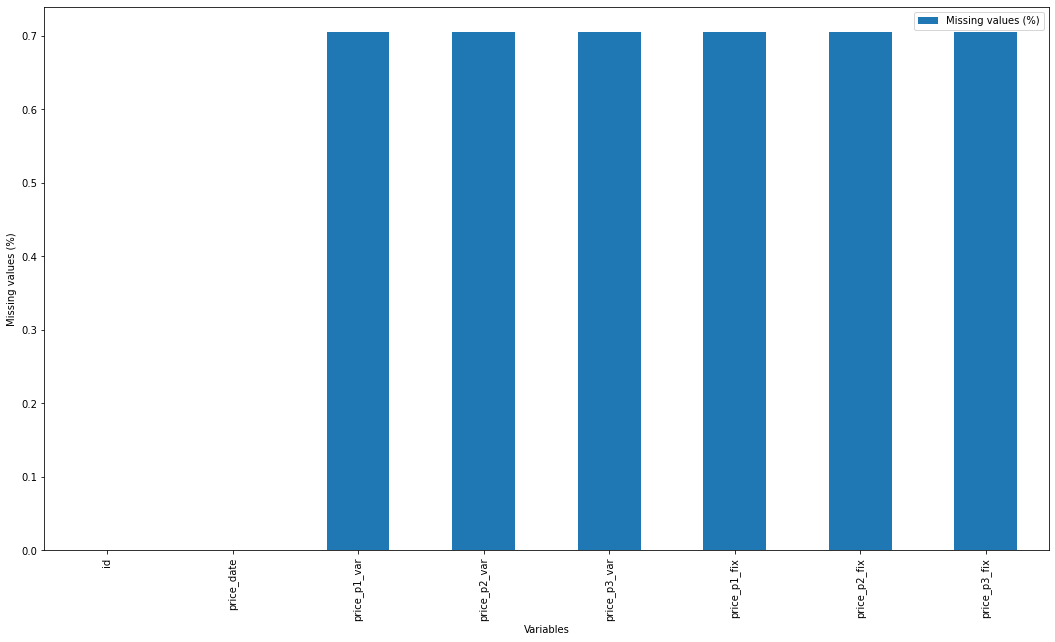

In [32]:
missing_data_percentage.plot(kind="bar", figsize=(18,10))
# Set labels
plt.xlabel("Variables")
plt.ylabel("Missing values (%)")
plt.show()


Seems like there are not many NaN values, but it looks like there are a lot of 0.0 values for historical prices of electricity and energy. I will visualise the electricity prices first.

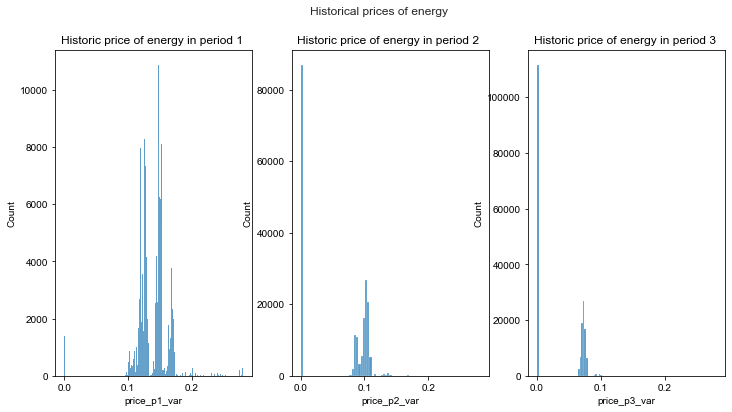

In [33]:
fig,axes = plt.subplots(1,3,figsize = (12,6),sharex = True,sharey = False)
sns.set_style("whitegrid")
fig.suptitle("Historical prices of energy")

sns.histplot(ax = axes[0],x = historical_data["price_p1_var"])
axes[0].set_title("Historic price of energy in period 1 ")

sns.histplot(ax = axes[1],x = historical_data["price_p2_var"])
axes[1].set_title("Historic price of energy in period 2 ")

sns.histplot(ax = axes[2],x = historical_data["price_p3_var"])
axes[2].set_title("Historic price of energy in period 3 ")

plt.show()

There is a lot of NaN and 0.0 values, but apart from that the destribution for all prices mostly stays in a certain range so can inpute NaN and 0.0 values with a mean value from existing entries.

In [34]:
missing_p1 = (historical_data["price_p1_var"].isnull()|(historical_data["price_p1_var"] == 0.0))
missing_p2 = (historical_data["price_p2_var"].isnull()|(historical_data["price_p2_var"] == 0.0))
missing_p3 = (historical_data["price_p3_var"].isnull()|(historical_data["price_p3_var"] == 0.0))

Second and third periods have a lot of data that is missing or is equal to 0.0.

Excluding the null values, the rest of the price values for all periods tended to fall within a range. Therefore can substitue null values with the period mean.

In [35]:
missing_p1 = (historical_data["price_p1_var"].isnull()|(historical_data["price_p1_var"] == 0.0))
missing_p2 = (historical_data["price_p2_var"].isnull()|(historical_data["price_p2_var"] == 0.0))
missing_p3 = (historical_data["price_p3_var"].isnull()|(historical_data["price_p3_var"] == 0.0))

existing_p1 = ((historical_data["price_p1_var"].isnull()==False)|(historical_data["price_p1_var"] != 0.0))
existing_p2 = ((historical_data["price_p2_var"].isnull()==False)|(historical_data["price_p2_var"] != 0.0))
existing_p3 = ((historical_data["price_p3_var"].isnull()==False)|(historical_data["price_p3_var"] != 0.0))

In [36]:
historical_data.loc[missing_p1,"price_p1_var"] = historical_data.loc[existing_p1,"price_p1_var"].mean()
historical_data.loc[missing_p2,"price_p2_var"] = historical_data.loc[existing_p2,"price_p2_var"].mean()
historical_data.loc[missing_p3,"price_p3_var"] = historical_data.loc[existing_p3,"price_p3_var"].mean()

Checking:

In [37]:
pd.DataFrame({"Missing values (%)": historical_data.isnull().sum()/len(historical_data.index)*100})


,Missing values (%)
id,0.000000
price_date,0.000000
price_p1_var,0.000000
price_p2_var,0.000000
price_p3_var,0.000000
price_p1_fix,0.704174
price_p2_fix,0.704174
price_p3_fix,0.704174


Secondly, I will visualise the historical prices of power.

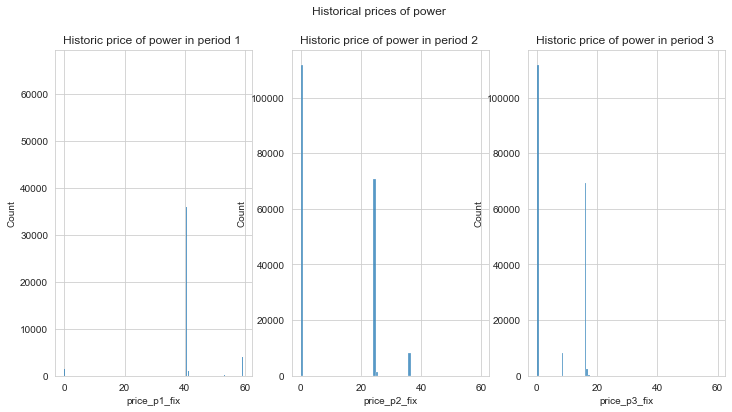

In [38]:
fig,axes = plt.subplots(1,3,figsize = (12,6),sharex = True,sharey = False)
sns.set_style("whitegrid")
fig.suptitle("Historical prices of power")

sns.histplot(ax = axes[0],x = historical_data["price_p1_fix"])
axes[0].set_title("Historic price of power in period 1 ")

sns.histplot(ax = axes[1],x = historical_data["price_p2_fix"])
axes[1].set_title("Historic price of power in period 2 ")

sns.histplot(ax = axes[2],x = historical_data["price_p3_fix"])
axes[2].set_title("Historic price of power in period 3 ")

plt.show()

Outside of 0.0 values prices tend to fall in one of the two categories.

In [39]:
missing_p1 = (historical_data["price_p1_fix"].isnull()|(historical_data["price_p1_fix"] == 0.0))
missing_p2 = (historical_data["price_p2_fix"].isnull()|(historical_data["price_p2_fix"] == 0.0))
missing_p3 = (historical_data["price_p3_fix"].isnull()|(historical_data["price_p3_fix"] == 0.0))

existing_p1 = ((historical_data["price_p1_fix"].isnull()==False)|(historical_data["price_p1_fix"] != 0.0))
existing_p2 = ((historical_data["price_p2_fix"].isnull()==False)|(historical_data["price_p2_fix"] != 0.0))
existing_p3 = ((historical_data["price_p3_fix"].isnull()==False)|(historical_data["price_p3_fix"] != 0.0))

In [40]:
historical_data.loc[missing_p1,"price_p1_fix"] = historical_data.loc[existing_p1,"price_p1_fix"].median()
historical_data.loc[missing_p2,"price_p2_fix"] = historical_data.loc[existing_p2,"price_p2_fix"].median()
historical_data.loc[missing_p3,"price_p3_fix"] = historical_data.loc[existing_p3,"price_p3_fix"].median()

Final check:

In [41]:
pd.DataFrame({"Missing values (%)": historical_data.isnull().sum()/len(historical_data.index)*100})

,Missing values (%)
id,0.0
price_date,0.0
price_p1_var,0.0
price_p2_var,0.0
price_p3_var,0.0
price_p1_fix,0.0
price_p2_fix,0.0
price_p3_fix,0.0


In [42]:
pd.DataFrame({"0.0 values (%)": historical_data[historical_data == 0.0].sum()/len(historical_data.index)*100})

,0.0 values (%)
id,0.0
price_date,0.0
price_p1_var,0.0
price_p2_var,0.0
price_p3_var,0.0
price_p1_fix,0.0
price_p2_fix,0.0
price_p3_fix,0.0


# Data Viz and EDA

Firstly, let's see how many customers left

In [43]:
train["churn"].mean()*100


9.909294234592446

Only 9.9% of customers churn

In [44]:
churn = train[["id","churn"]]

In [45]:
churn_total = churn.groupby(churn["churn"]).count()
churn_percentage = churn_total/churn_total.sum()*100

In [62]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    
    ax = dataframe.plot(kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_)
    # Annotation
    
    autolabel(ax)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    
    plt.ylabel("Company base (%)")
    plt.xlabel("Companies")
    plt.show()


def autolabel(ax):
    """Attach a text label above the bar , displaying its height."""
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')

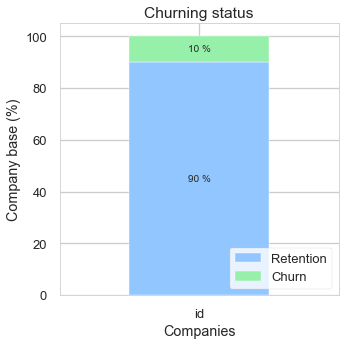

In [63]:
plot_stacked_bars(churn_percentage.transpose(),"Churning status", (5,5), legend_="lower right")

Next step would be to explore if churn depends on activity. The limitation of this is the fact that activity data has almost 60% of missing values.

In [48]:
activity = train[["id","activity_new","churn"]]

In [49]:
activity.head()

,id,activity_new,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,0
4,bba03439a292a1e166f80264c16191cb,NaN,0


In [50]:
activity = activity[activity["activity_new"].isnull() == False].groupby(["activity_new","churn"])["id"].count().unstack(level = 1).sort_values(by = [0],ascending = True )

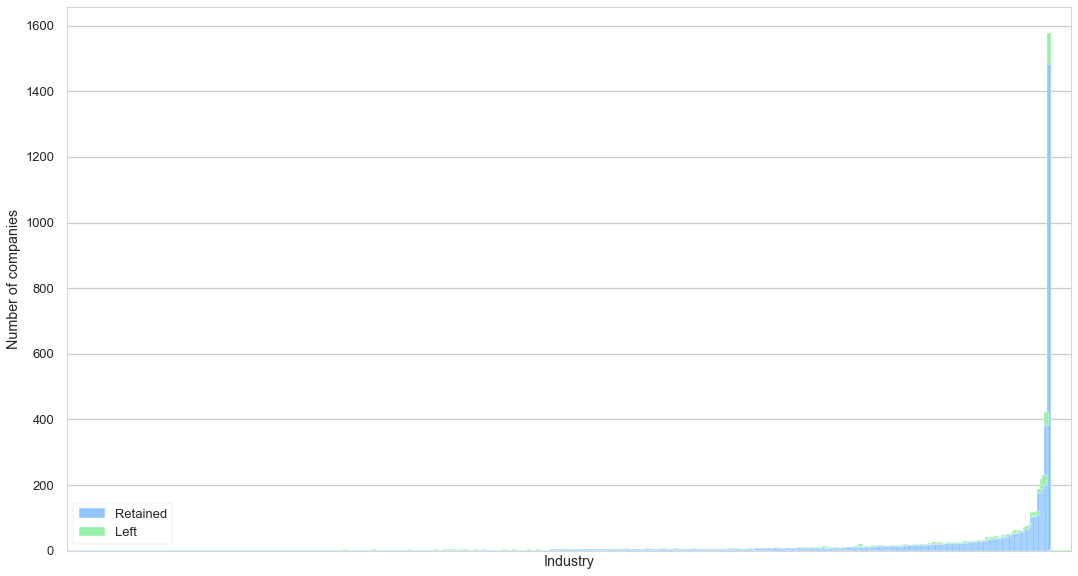

In [61]:
activity.plot(kind = "bar",stacked = True,figsize=(18, 10),
 width=2)

plt.xlabel("Industry")
plt.ylabel("Number of companies")
plt.xticks([])
plt.legend(["Retained","Left"],loc = 3)

plt.show()

Does not seem like churn rate depends on customer's industry. However, the limitation of this graph is the fact that almost 40% of industry entries are missing.

From the data it also seemed like a few customers had both negative gross margin, net margin (from energy and power), and also negative total margin(which included other products)

In [52]:
train[(train["net_margin"]<0) & (train["margin_net_pow_ele"]<0)][["margin_net_pow_ele","net_margin"]].count()

margin_net_pow_ele    20
net_margin            20
dtype: int64

20 customers bring negative margines to Power Co. Can drop these entries as it's unlikely power co will offer them more discount

In [53]:
i = train[(train["net_margin"]<0) & (train["margin_net_pow_ele"]<0)].index # getting index of negative margins and total margins
train.drop(i,inplace = True)

Next Step would be to check if sales channel is responsible for churn. I.e., does the way the company gets their customers affect the retantion rate.

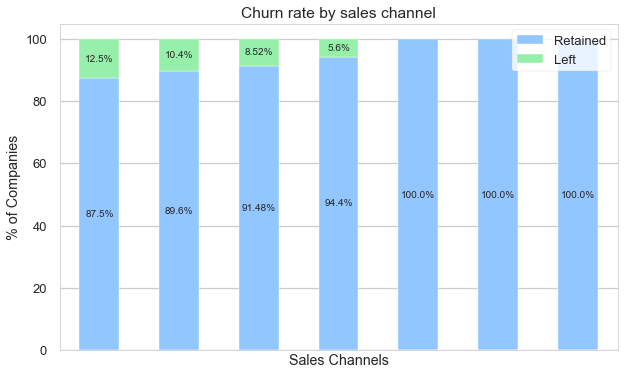

In [60]:
plt.style.use('seaborn-pastel')

channel = train[['id','channel_sales','churn']]
#Similar approach as to group by channel as the approach taken for industry above
channel = channel[channel["channel_sales"].isnull()==False]

channel = channel.groupby(["channel_sales","churn"])["id"].count().unstack(level = 1).fillna(0)

channel_percentage = (channel.div(channel.sum(axis = 1),axis = 0)*100).sort_values(by = [0],ascending = True)


channel_percentage

ax = channel_percentage.plot(kind = "bar",
                            stacked = True,
                            figsize = (10,6),
                            title = "Churn rate by sales channel")
plt.legend(["Retained","Left"], loc = 1)

plt.xlabel("Sales Channels")
plt.ylabel("% of Companies")
plt.xticks([])

for p in ax.patches:
    if p.get_height() == 0.0:
        continue
    width,height = p.get_width(),round(p.get_height(),2) #height is the percentage of churned/retained
    x,y = p.get_xy()
    ax.text(x + width/2,
            y + height/2,
           f"{height}%",
           horizontalalignment='center', 
            verticalalignment='center')
        
plt.show()




num_years_antig column refers to the number of years a customer stayed with Power co. Can see if loyalty/recency plays any part in churn rate

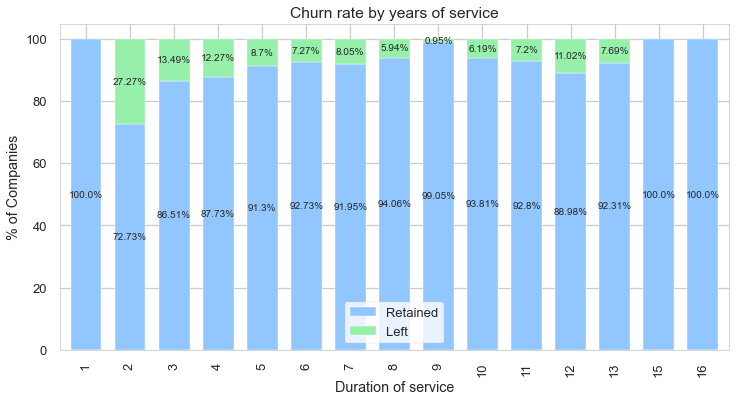

In [59]:
plt.style.use('seaborn-pastel')

duration = train[['id','num_years_antig','churn']]
#Similar approach as to group by channel as the approach taken for channel sales above
duration = duration[duration["num_years_antig"].isnull()==False]

duration = duration.groupby(["num_years_antig","churn"])["id"].count().unstack(level = 1).fillna(0)

duration_percentage = (duration.div(duration.sum(axis = 1),axis = 0)*100)


ax = duration_percentage.plot(kind = "bar",
                            stacked = True,
                            figsize = (12,6),
                            title = "Churn rate by years of service",
                             width = 0.7)
plt.legend(["Retained","Left"], loc = 8)
plt.xlabel("Duration of service")
plt.ylabel("% of Companies")

for p in ax.patches:
    if p.get_height() == 0.0:
        continue
    width,height = p.get_width(),round(p.get_height(),2) #height is the percentage of churned/retained
    x,y = p.get_xy()
    ax.text(x + width/2,
            y + height/2,
           f"{height}%",
           horizontalalignment='center', 
            verticalalignment='center')
        
plt.show()



Lets check if the subscription for gas corresponds to more churn.

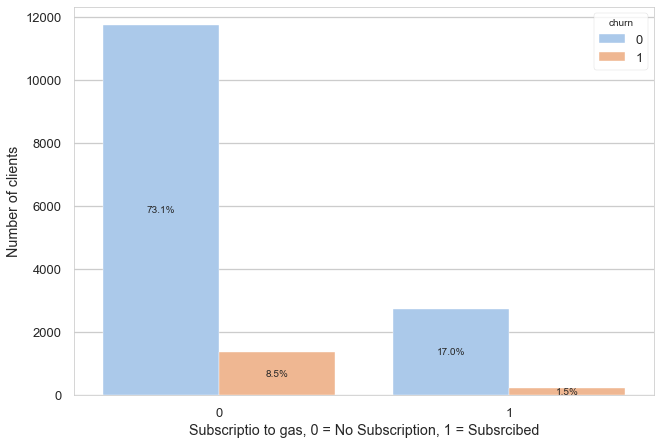

In [64]:
by_gas = train.groupby(["churn","has_gas"],as_index = False)["id"].count()


ax = sns.barplot(data=by_gas, x = "has_gas", y = "id",hue = "churn",palette = "pastel")

plt.ylabel("Number of clients")
plt.xlabel("Subscriptio to gas, 0 = No Subscription, 1 = Subsrcibed")

total = by_gas["id"].sum()

for p in ax.patches:
    if p.get_height() == 0.0:
        continue
    width,height = p.get_width(),round(p.get_height(),2)
    x,y = p.get_xy()
    ax.text(x + width/2,
            y + height/2,
           f"{round((height/total),3)*100}%",
           horizontalalignment='center', 
            verticalalignment='center')

plt.show()